#**TUGAS NO. 1 DATASET HOUSE PRICE**

##Import Library

In [ ]:
#Import warnings untuk mengabaikan pemberitahuan yang kurang penting
import warnings
warnings.filterwarnings('ignore')

#Import library yang akan digunakan untuk olah data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import library Linear Regression
from sklearn.linear_model import LinearRegression

##Load Data

In [ ]:
#Import dataset csv ke google colab
df = pd.read_csv("train.csv")

In [ ]:
#Menampilkan dataframe House Price
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##EXPLORATORY DATA ANALYSIS

###Data Understanding

In [ ]:
#Melihat kolomnya terdiri dari apa saja
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#Melihat tipe datanya terlebih dahulu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#lihat jumlah kolom terlebih dahulu
len(df.columns)

81

In [ ]:
#Melihat gambaran rata-rata, jumlah, median dataframe 
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


###Removing kolom yang tidak digunakan

In [ ]:
#Drop kolom Id karena tidak digunakan
df = df.drop("Id", axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###Mengganti tipe kolom yang salah

In [ ]:
#Mengganti tipe data SeniorCitizem menjadi object
df['GarageYrBlt'] = df['GarageYrBlt'].astype('O')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

###Missing Value Checking

In [ ]:
#Cek missing value pada kolom 0-50
df.isnull().sum().head(50)

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [ ]:
#Cek missing value pada kolom 51-80
df.isnull().sum().tail(30)

BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

Dari Kode tersebut terlihat bahwa kolom yang missing antara lain ialah dengan pengklasifikasian banyak atau sedikit

**Jumlah Missing sedikit =** 
MasVnrType,MasVnrArea,Electrical,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2

**Jumlah Missing Banyak=** 
LotFrontage (float64), {(Alley, FireplaceQu, GarageType,GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature) (Object) }


####Hapus baris yang jumlah missing sedikit

In [ ]:
#Menghapus yang jumlah missingnya <10
df = df.dropna(subset=['MasVnrType','MasVnrArea','Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'])

####Mengisi Missing value yang variabelnya numerik dengan median

In [ ]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

####Mengatasi Missing value Object (NaN)

Pada pertemuan week 5-6 dikatakan bahwa handeling missing value dengan jumlah yang sangat banyak bisa diisi oleh Unk

In [ ]:
#Jika jumlah missing banyak
#Maka bisa menggunakan unk/others
z
df['FireplaceQu'] = np.where(df['FireplaceQu'].isnull(),'unk',df['FireplaceQu'])
df['GarageType'] = np.where(df['GarageType'].isnull(),'unk',df['GarageType'])
df['GarageYrBlt'] = np.where(df['GarageYrBlt'].isnull(),'unk',df['GarageYrBlt'])
df['GarageFinish'] = np.where(df['GarageFinish'].isnull(),'unk',df['GarageFinish'])
df['GarageQual'] = np.where(df['GarageQual'].isnull(),'unk',df['GarageQual'])
df['GarageCond'] = np.where(df['GarageCond'].isnull(),'unk',df['GarageCond'])
df['PoolQC'] = np.where(df['PoolQC'].isnull(),'unk',df['PoolQC'])
df['Fence'] = np.where(df['Fence'].isnull(),'unk',df['Fence'])
df['MiscFeature'] = np.where(df['MiscFeature'].isnull(),'unk',df['MiscFeature'])

####Cek Kembali Missing Value

In [ ]:
#Mengecek kembali Missing Value
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

###Pendekatan Numerik dan Kategorik

In [ ]:
#Jika data bersifat objek maka akan secara otomatis menjadi data bersifat kategorik
cats=[i for i in df.columns if df[i].dtypes == 'object']
#Jika data tidak bersifat objek maka datanya bersifat numerik
nums=[i for i in df.columns if df[i].dtypes != 'object']

In [ ]:
#Melihat nilai statistiknya seperti median, mean, dsb
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1412.0,56.851983,42.309163,20.0,20.00,50.0,70.00,190.0
LotFrontage,1412.0,70.114731,22.283233,21.0,60.00,70.0,79.00,313.0
LotArea,1412.0,10536.987252,10113.840927,1300.0,7572.75,9500.0,11618.25,215245.0
OverallQual,1412.0,6.138810,1.357655,1.0,5.00,6.0,7.00,10.0
OverallCond,1412.0,5.595609,1.110511,1.0,5.00,5.0,6.00,9.0
YearBuilt,1412.0,1971.428470,30.371732,1872.0,1954.00,1973.0,2000.25,2010.0
YearRemodAdd,1412.0,1985.191218,20.462484,1950.0,1968.00,1994.0,2004.00,2010.0
MasVnrArea,1412.0,105.366856,182.340601,0.0,0.00,0.0,168.00,1600.0
BsmtFinSF1,1412.0,453.694759,455.373263,0.0,0.00,399.0,719.25,5644.0
BsmtFinSF2,1412.0,47.792493,163.410333,0.0,0.00,0.0,0.00,1474.0


In [ ]:
#Pada describe ini memungkinkan untuk melihat jumlah unique dan frekuensi
df[cats].describe().T

,count,unique,top,freq
MSZoning,1412,5,RL,1111
Street,1412,2,Pave,1406
Alley,1412,3,unk,1323
LotShape,1412,4,Reg,886
LandContour,1412,4,Lvl,1267
Utilities,1412,2,AllPub,1411
LotConfig,1412,5,Inside,1015
LandSlope,1412,3,Gtl,1335
Neighborhood,1412,25,NAmes,215
Condition1,1412,9,Norm,1220


### Multivariate Analysis

<Axes: >

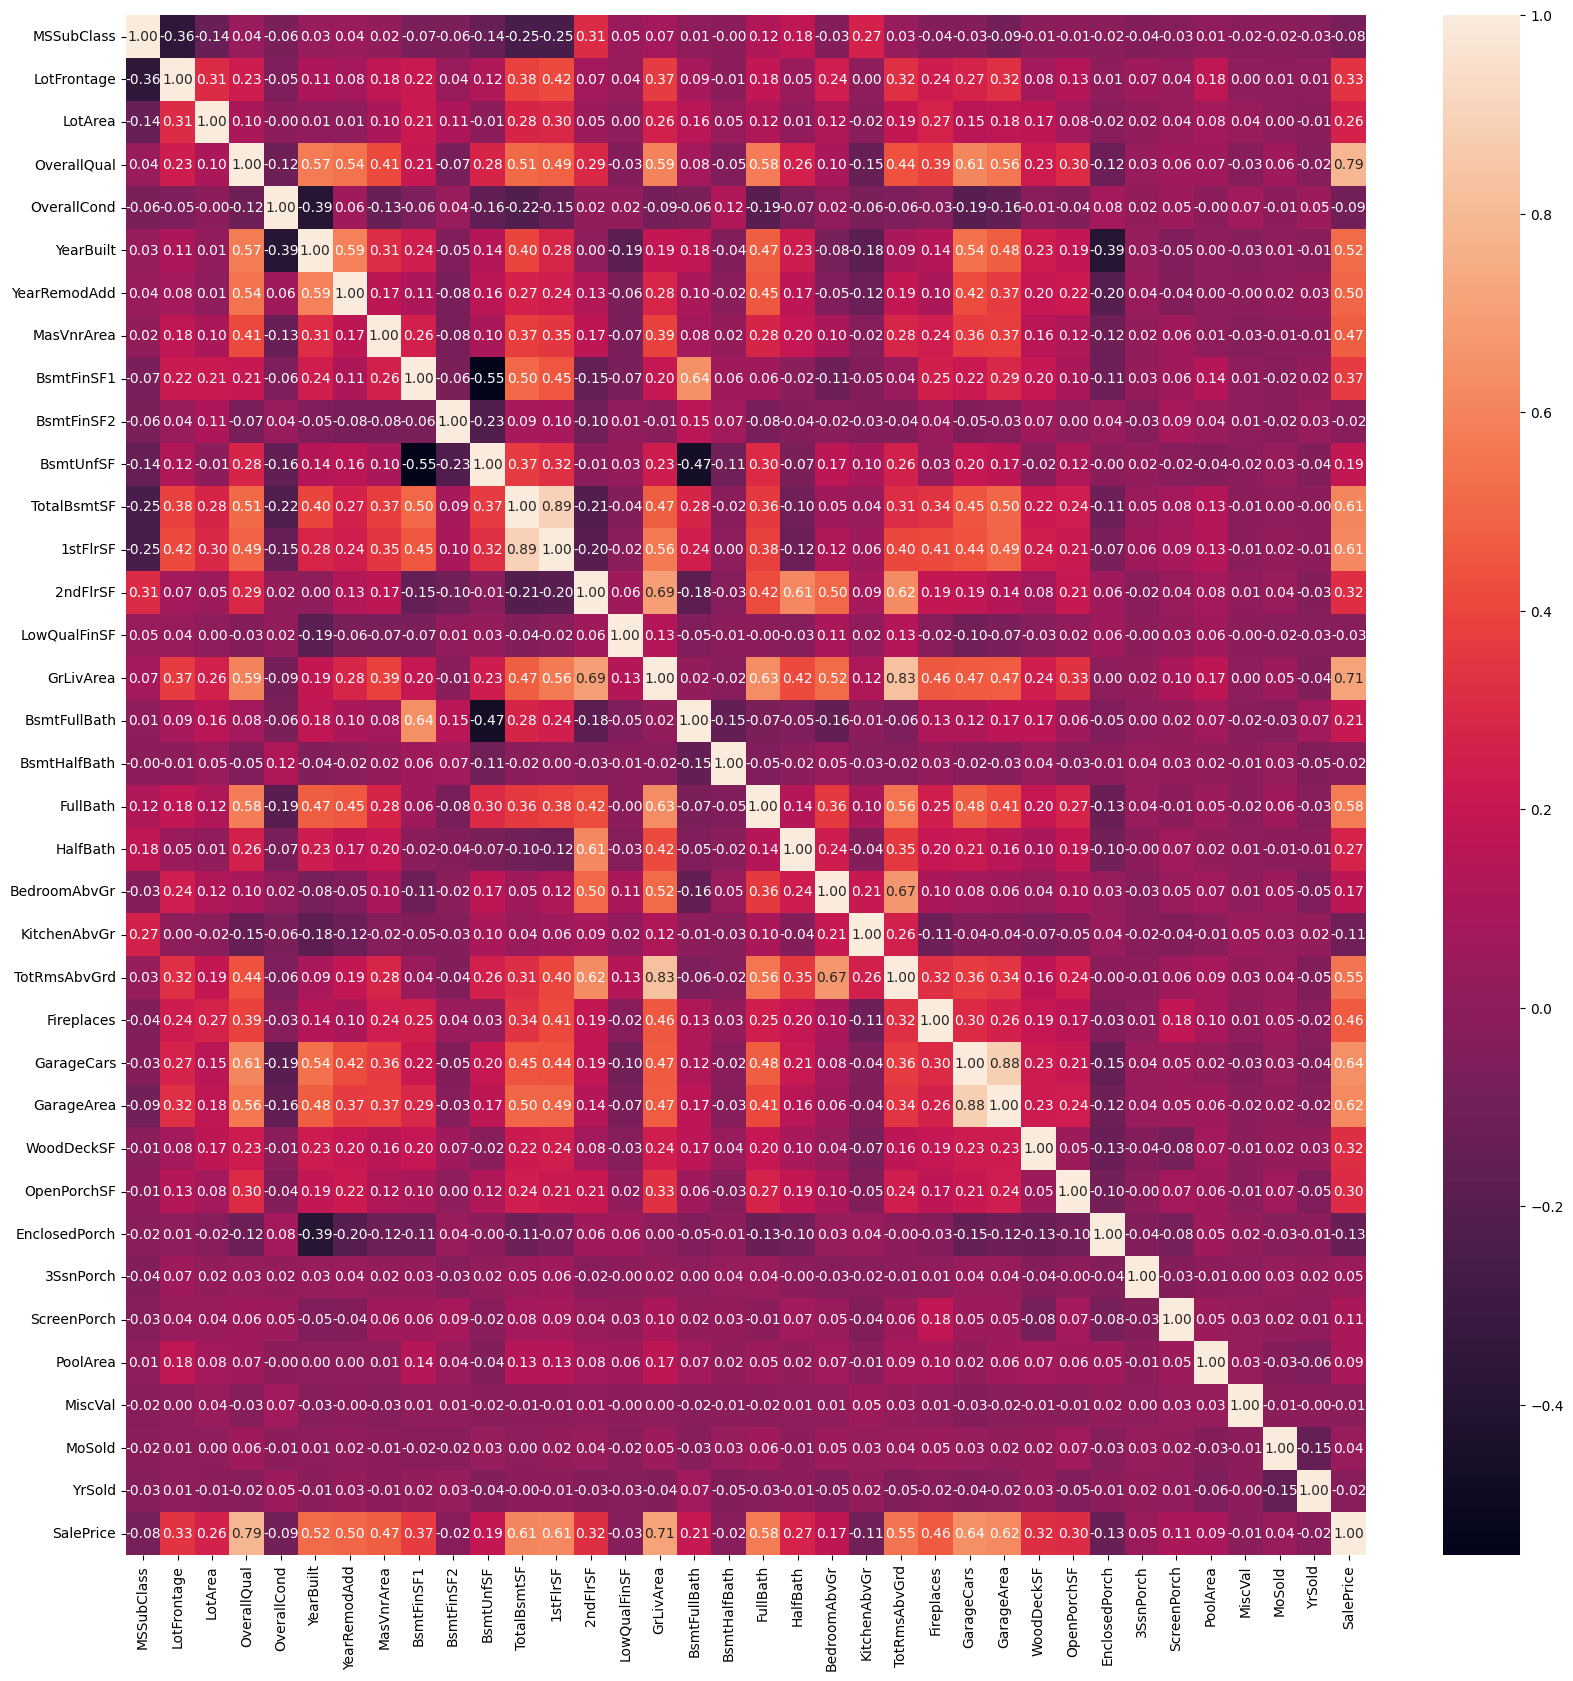

In [ ]:
#Memplot data dengan ukuran gambar panjang 20 lebar 20
plt.figure(figsize=(20, 20))
#Memplot heatmap untuk melihat kolerasi satu sama lain
sns.heatmap(df.corr(), annot=True, fmt='.2f')

**PENJELASAN**

Dalam Visualisasi data di proses EDA ini yaitu dengan plot pembuatan heatmap dapat diketahui bahwa :
- Jika angka pada heatmap (+) (positif) maka akan berbanding lurus yaitu semakin besar suatu variabel maka variabel lainnya juga akan semakin besar pula.

Dari penjelasan heatmap maka dapat ditentukan variabel manakah yang cocok untuk dibuat model Linear Regression bersamaan dengan variabel SalePrices karena dataset ini berhubungan dengan prediksi harga rumah. Dari nilai heatmap tersebut berdasarkan korelasinya dengan SalePrice maka GrLivArea cocok untuk dibuat model Linear Regresion karena nilainya cukup besar yaitu positive 0.71 sehingga persebaran datanya juga akan linear menaik tidak tersebar jauh sehingga korelasinya dapat dilihat.

##Linear Regression with sklearn

In [ ]:
#Membuat dataframe mengubah data kategori menjadi numerik menggunakan Pandas
df = pd.get_dummies(df, drop_first = True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
#Membuat dataframe baru yang terdiri dari kolom GrLivArea dan SalePrice
data = df[['GrLivArea','SalePrice']]
data.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [ ]:
#Mengubah nama kolom menjadi x dan y untuk memudahkan proses regression
data.columns = ['x','y']
data.head()

,x,y
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [ ]:
#Membuat data x dan y dengan dimensi axis -1,1
x = data.x.values.reshape(-1,1)
y = data.y.values.reshape(-1,1)

#Membuat fungsi linearregression
model = LinearRegression().fit(x, y)

#Menghitung otomatis untuk mencari b0 dan b1
b0 = float(model.intercept_[0])
b0 = round(b0,3)
b1 = float(model.coef_[0][0])
b1 = round(b1,3)
#Menampilkan intercept dan kemiringan (slope)
print('intercept (b0 ): ', b0)
print('slope (b1) : ', b1)
print(' ')
#Menampilkan dalam bentuk parameter y
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
print(textstr)

intercept (b0 ):  19902.78
slope (b1) :  106.991
 
y = 19902.78 + 106.991 * x


Text(0, 0.5, 'SalePrice')

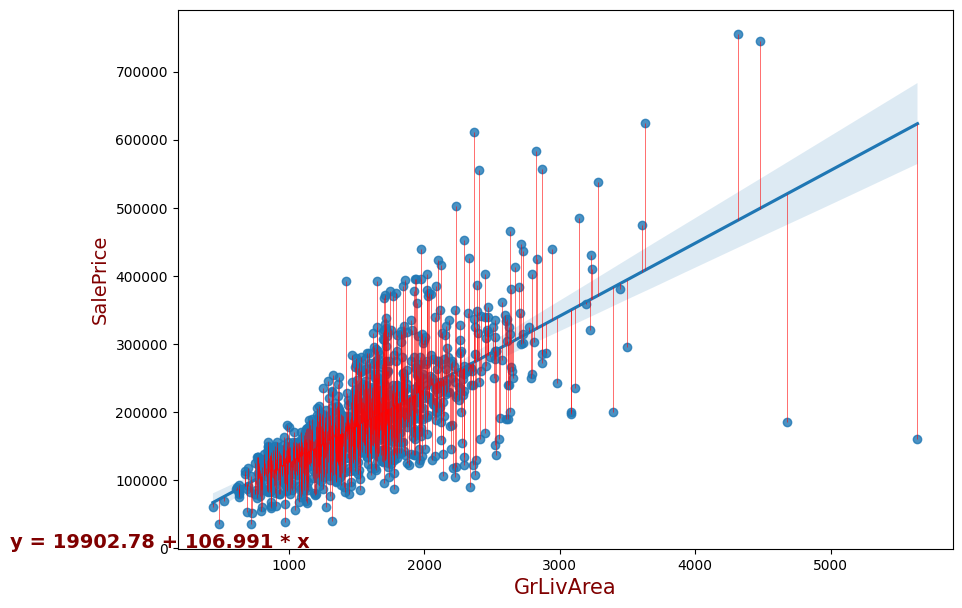

In [ ]:
#plot data x dan y
fit = np.polyfit(data['x'], data['y'], deg=1)
y_hat = fit[1] + data['x'] * fit[0]

#plot data dengan linear regression dan ukuran panjang 10 lebar 7
fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x='x', y='y', data=data)
plt.vlines(data['x'], y_hat, data['y'], lw = .4, colors='r');

#Menambahkan label (judul) pada variabel x dan y serta parameter y
ax.text(46,24,textstr,horizontalalignment='center',color='#800000',fontsize=14,fontweight='bold')
ax.set_xlabel('GrLivArea', fontsize=15, color='#800000')
ax.set_ylabel('SalePrice', fontsize=14, color='#800000')

**PENJELASAN :**

Berdasarkan penentuan Linear Regression, harga rumah dapat ditentukan dari hubungan antara GrLivArea dan SalePrice. Cara menentukan/mencari harga rumah dapat diketahui dari mengalikan 106.991 x (X) (GrLivArea). Kemudian dijumlahkan dengan 19902.78 sehingga dapat diperoleh nilai harga rumah tersebut. Selain itu, GrLivArea merupakan luas tanah per ruang tamu. Dari hal itulah, nilai GrLivArea dapat dikalikan dengan mean SalePrice sehingga harga jual rumah per dollar ($) akan diketahui. Dengan demikian,tujuan untuk mencari harga rumah (house price) tercapai. Kemudian, jika melihat plot graph tersebut, semakin luas tanah dari GrLivArea maka nilai penjualan atau house price semakin besar/mahal.

## Train Test Split

In [ ]:
#Import library fungsi train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
#Membagi dataset menjadi train set dan test set
X = x
Y = y
#train_X: Untuk menampung data source yang akan dilatih.
#test_X: Untuk menampung data target yang akan dilatih.
#train_y: Untuk menampung data source yang akan digunakan untuk testing.
#test_y: Untuk menampung data target yang akan digunakan untuk testing.
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size=0.2, random_state= 0)

## Model Metrik Evaluation

In [ ]:
#Mengimport library sklearn model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#Membuat linear regression object
linreg = LinearRegression()
#Membuat prediksi menggunakan train dan test
linreg.fit(train_X, train_y)
linregpred = linreg.predict(test_X)

In [ ]:
# MAE
# Menghitung perbedaan absolut antara nilai aktual dan prediksi
mean_absolute_error(test_y, linreg.predict(test_X))

36285.57637036266

In [ ]:
# MSE
# Menentukan perbedaan kuadrat nilai aktual dan prediksi
mean_squared_error(test_y, linreg.predict(test_X))

2707904782.134451

In [ ]:
# RMSE
# Akar kuadrat dari kesalahan kuadrat rata-rata
mean_squared_error(test_y, linreg.predict(test_X), squared=False)

52037.53243702521

In [ ]:
# MAPE
# Memperkirakan perkiraan kesalahan dibandingkan nilai sebenarnya
mean_absolute_percentage_error(test_y, linreg.predict(test_X))

0.23652964739789317

**PENJELASAN**

Nilai SalePrice yang tinggi atau tidak hanya bernilai satuan, tetapi ribuan maupun puluhan hingga ratusan ribu menyebabkan nilai error angkanya besar. Hal tersebut karena angka pada SalePrice yang besar sehingga nilai errornya juga bersifat sama yaitu besar pula. Maksud dari artian besar disini bukanlah tingkat errornya yang sangat tinggi sehingga gap antara nilai sesungguhya dan nilai yang diperoleh beda jauh. Akan tetapi, maksud dari artian errornya besar disini yaitu nilai error yang diperoleh tidak bernilai satuan karena nilai SalePricenya yang ratusan hingga puluhan ribu sehingga angka errornya bernilai ribuan juga.

#**Tugas No.2 Dataset : Popular Unsupervised Clustering Algorithms**

##IMPORT LIBRARY

In [ ]:
#Import warnings untuk mengabaikan pemberitahuan yang kurang penting
import warnings
warnings.filterwarnings('ignore')

#Import library yang akan digunakan untuk olah data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Load Data

In [ ]:
#Import dataset csv ke google colab
df2 = pd.read_csv("Mall_Customers.csv")

In [ ]:
#Menampilkan dataframe Mall_Customers
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##EXPLORATORY DATA ANALYSIS

###Data Understanding

In [ ]:
#Melihat berapa banyak jumlah baris dan kolom
df2.shape

(200, 5)

In [ ]:
#Melihat kolom apa saja yang ada pada dataset
df2.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
#Melihat tipe datanya terlebih dahulu
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Rename beberapa kolom yang sulit/kepanjangan namanya
df2.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df2.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Missing Value Checking

In [ ]:
#Cek Missing Value
df2.isnull().sum()

#Missing value tidak ditemukan pada data ini

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

### Pendekatan Numerik dan Kategorik

Pendekatan ini bertujuan untuk memahami data dan dapat digunakan untuk memprediksi pembuatan hasil visualisasi data.

In [ ]:
#Mengecualikan data yang bersifat objek sehingga diperoleh data numerik
df2_numerical_features = df2.select_dtypes(exclude='object')
df2_numerical_features

,CustomerID,Age,Income,Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [ ]:
#Melihat data yang bersifat objek sehingga diperoleh data categorical
df2_categorical_features = df2.select_dtypes(include='object')
df2_categorical_features

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


###Bivariative Analysis

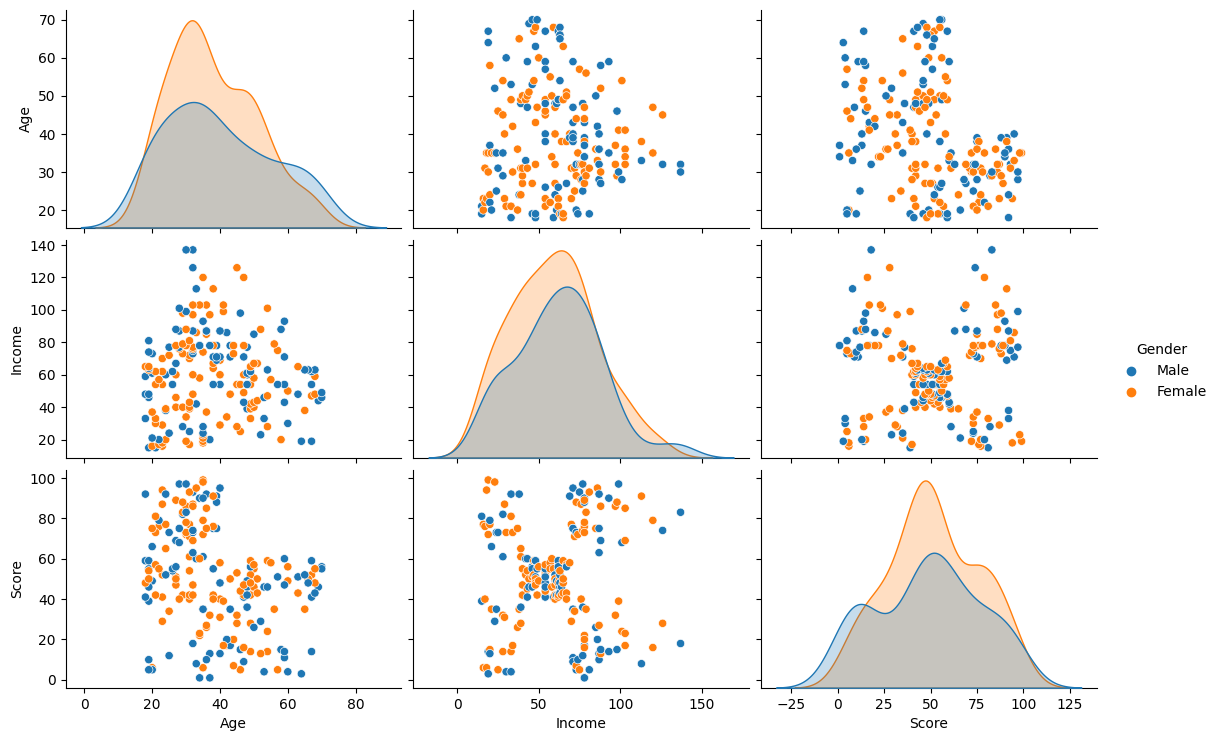

In [ ]:
#Membuat pairplot dengan mendrop customer ID
X = df2.drop(['CustomerID', 'Gender'], axis=1)
#Membuat pairplot dengan titik persebaran berdasarkan gender
sns.pairplot(df2.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

**PENJELASAN :**

Pada hasil visualisasi data dapat terlihat bahwa distribusinya cenderung acak dan tidak bisa diketahui berdasarkan kelas/labelnya. Persebaran data dari hasil plot tersebut tersebar acak dan kurang bisa dilihat korelasinya satu sama lain secara langsung. Kemudian grafik yang dihasilkan berjenis Bimodal yang mana  tidak ada satupun nilai data yang muncul dengan frekuensi tertinggi. Oleh karena itu sesuai dengan "Unsupervised Learning" yang datanya tidak diketahui kelas dan labelnya sehingga proses ini bertujuan untuk mengelompokan data ke dalam kluster-kluster (Clustering). Dari hal ini, akan dilakukan proses pengklusteran data menggunakan K-Means.

##Model Clustering K-Means

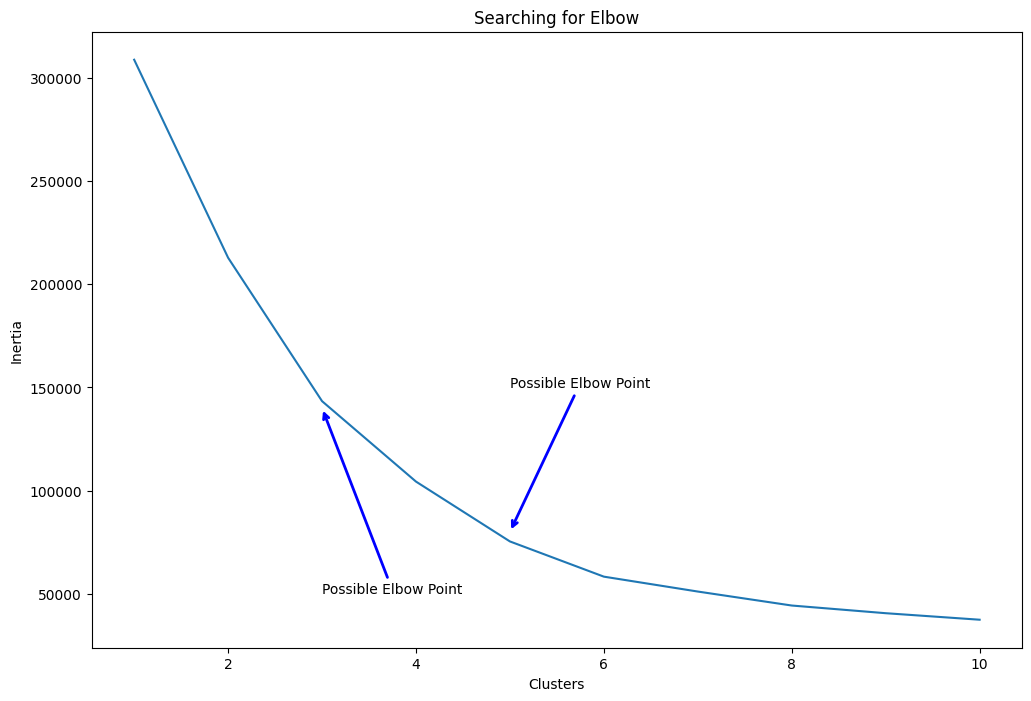

In [ ]:
#Import library Kmeans
from sklearn.cluster import KMeans

clusters = []

#Set ukuran axis x dari 1-11
for i in range(1, 11):
#Membuat dataframe km berdasarkan n_cluster
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
#Menset ukuran plot
fig, ax = plt.subplots(figsize=(12, 8))
#Membuat lineplot pada axis x dan y
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
#Set title dan label variabel x dan y
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Menambahkan keterangan pada plot grafik
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


**PENJELASAN**

Elbow Method dapat memberi tahu kita untuk memilih cluster ketika ada perubahan inersia yang signifikan. Seperti yang dapat dilihat dari plot grafik, apat dikatakan bahwa proses pengklusteran yang cocok digunakan pada data ini mungkin 3 atau 5. 

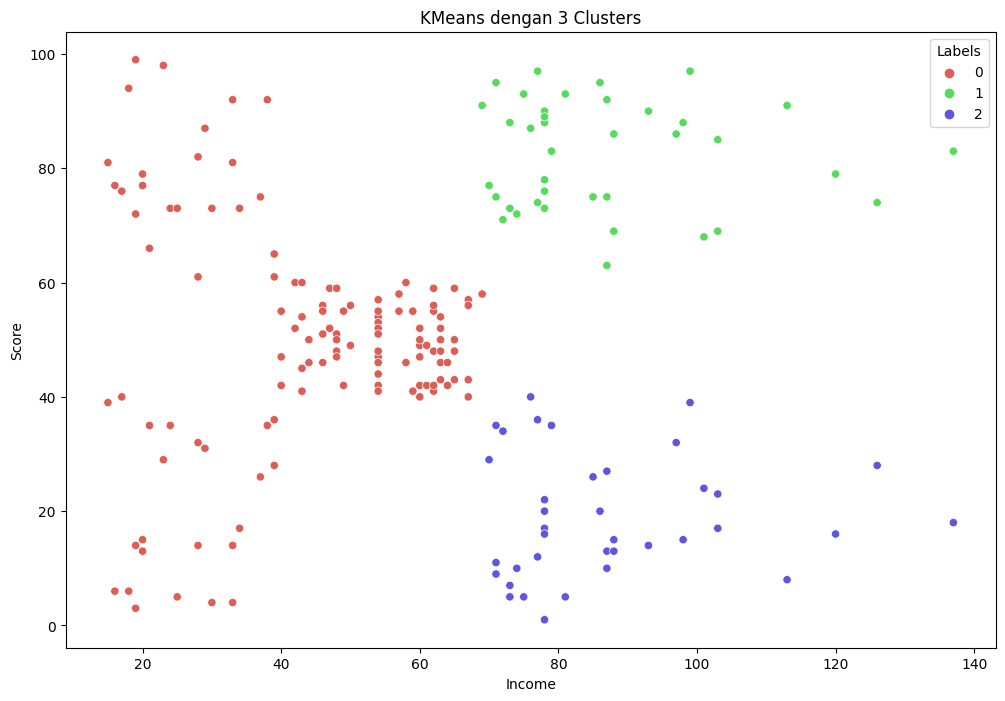

In [ ]:
# Membuat 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

# Menset X['labels']
X['Labels'] = km3.labels_
# plot gambar dengan panjang 12 lebar 8
plt.figure(figsize=(12, 8))
# Membuat scatterplot x dan y dengan 3 label (0,1,2)
sns.scatterplot(x = X['Income'], y = X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
# Menambahkan title pada plot 
plt.title('KMeans dengan 3 Clusters')
# Plot ditampilkan
plt.show()

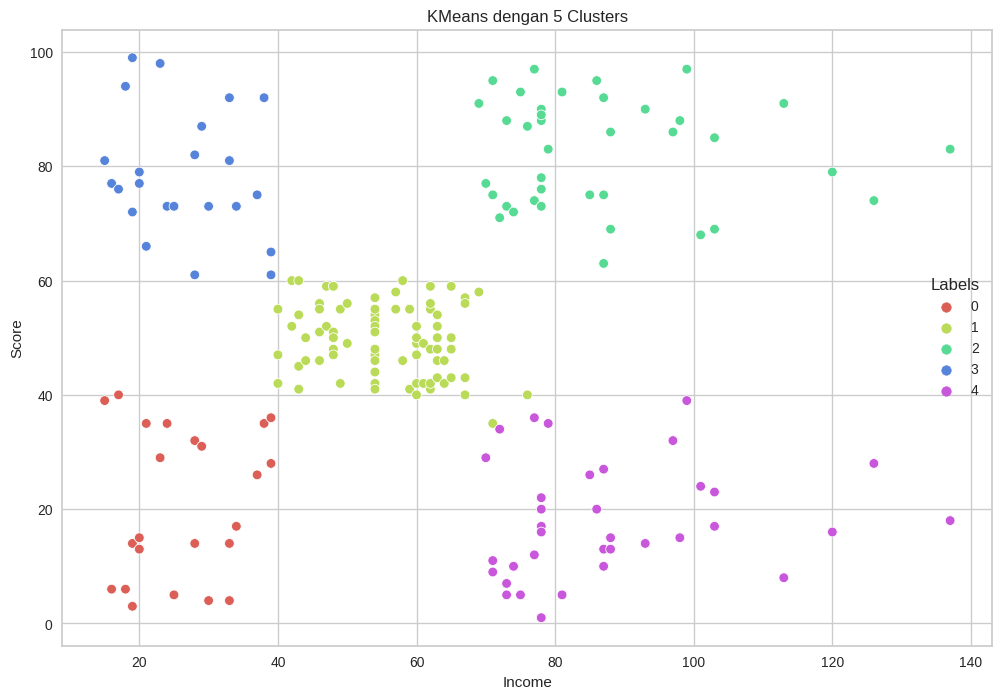

In [ ]:
#Membuat 5 cluster
km5 = KMeans(n_clusters=5).fit(X)

# Menset X['labels']
X['Labels'] = km5.labels_
# plot gambar dengan panjang 12 lebar 8
plt.figure(figsize=(12, 8))
# Membuat scatterplot x dan y dengan 5 label (0,1,2,3,4)
sns.scatterplot(x = X['Income'], y = X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
# Menambahkan title pada plot
plt.title('KMeans dengan 5 Clusters')
# Plot ditambahkan
plt.show()

**PENJELASAN**

Dengan menilai dari plot dapat dikatakan bahwa 5 cluster tampaknya lebih baik daripada 3 cluster. Hal ini karena, pengelompokan 5 cluster terlihat lebih jelas dan lebih detail dalam pengklusterannya.

Analisis 5 cluster dapat diketahui secara detail sebagai berikut:

- Label 0 adalah pendapatan rendah dan pengeluaran rendah
- Label 1 adalah pendapatan menengah dan pengeluaran pertengahan
- Label 2 adalah pendapatan tinggi dan pengeluaran tinggi
- Label 3 adalah pendapatan rendah dan pengeluaran tinggi
- Label 4 adalah pendapatan tinggi dan pengeluaran rendah

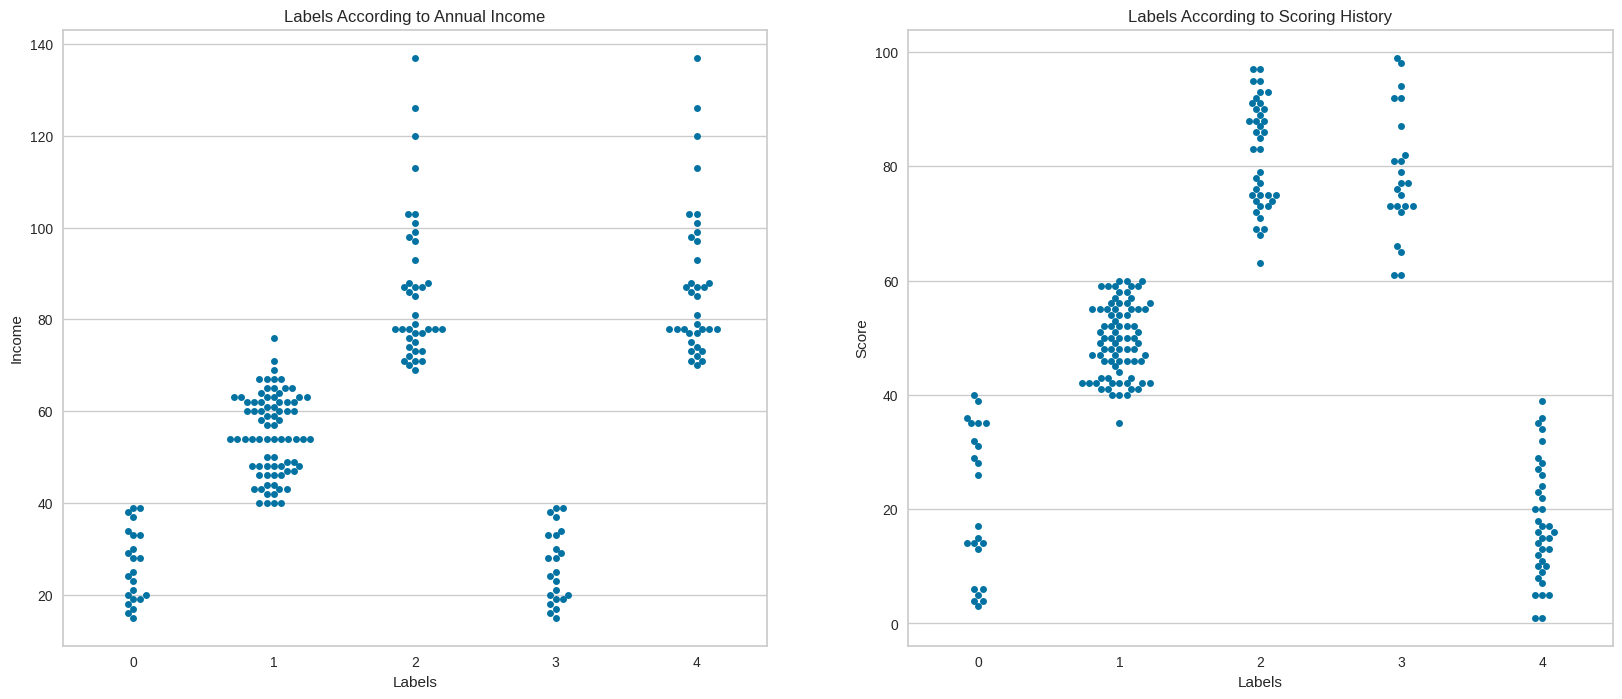

In [ ]:
#Plot figure ukuran panjang 20 lebar 8
fig = plt.figure(figsize=(20,8))
# Menambahkan subplot
ax = fig.add_subplot(121)
# Plot swarmplot x dan y berdasarkan data X
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
# Set title dari hasil plot 
ax.set_title('Labels According to Annual Income')

# Menambahkan subplot
ax = fig.add_subplot(122)
# Plot swarmplot x dan y berdasarkan data X
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
# Set title dari hasil plot 
ax.set_title('Labels According to Scoring History')

# Plot ditampilkan
plt.show()

**PENJELASAN**

Dari swarmplot tersebut, dapat terlihat jelas seperti hasil analisis pada pengklusteran 5 labels. Dari hasil analisis tersebut, pendistribusiannya dapat dilihat secara lebih jelasnya lagi sebagai berikut : 
- Label 0 adalah pendapatan rendah dan pengeluaran rendah karena incomenya terdistribusi antara 10-40 serta scorenya dari kisaran 0-40.
- Label 1 adalah pendapatan menengah dan pengeluaran pertengahan karena bagian incomenya terdistribusi antara 40-80 dan scorenya terdistribusi antara kisaran 35-60
- Label 2 adalah pendapatan tinggi dan pengeluaran tinggi karena incomenya terdistribusi dari kisaran 70-140 serta scorenya terdistribusi antara 60-100 
- Label 3 adalah pendapatan rendah dan pengeluaran tinggi karena incomenya terdistribusi antara 10-40 serta scorenya terdistribusi dari 60-100
- Label 4 adalah pendapatan tinggi dan pengeluaran rendah karena incomenya terdistribusi antara 70-140 dan scorenya terdistribusi antara 0-40

##Model Evaluation

### Silhouette Analysis

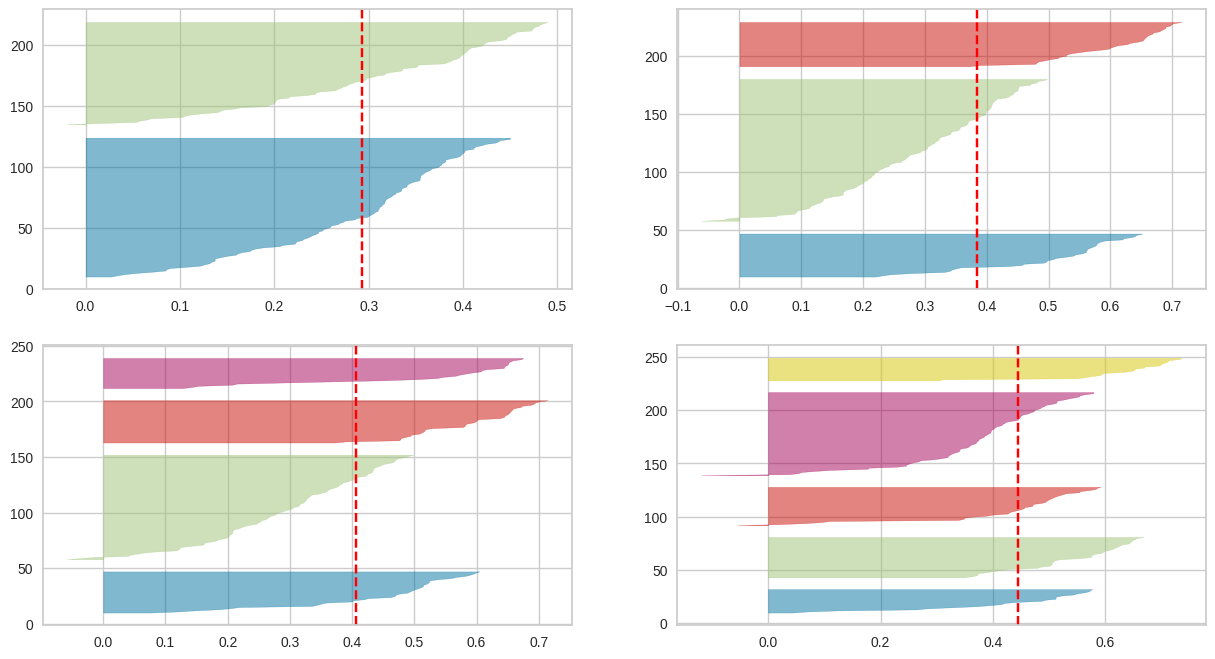

In [ ]:
# Import library
from yellowbrick.cluster import SilhouetteVisualizer

# Menset subplot dan ukuran gambar
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
# Membuat KMeans dengan number cluster yang berbeda
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
# Membuat visualisasi silhouette dengan KMeans yang diperoleh
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
# Memvisualisasikan data dengan Silhouettevisualizer dan menset colors 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

**PENJELASAN**

Silhouette adalah ukuran kinerja algoritme pengelompokan. Setelah menghitung koefisien siluet dari setiap titik dalam kumpulan data, plotlah untuk mendapatkan representasi visual tentang seberapa baik kumpulan data tersebut dikelompokkan menjadi k cluster. Plot siluet menampilkan ukuran seberapa dekat setiap titik dalam satu klaster dengan titik-titik di klaster tetangga dan dengan demikian menyediakan cara untuk menilai parameter seperti jumlah klaster secara visual. Ukuran ini memiliki kisaran [-1, 1]. Dari hasil visualisasi tersebut, dapat terlihat bahwa pengklusteran n = 5 paling optimal karena semua plot memiliki ketebalan yang beberapanya kurang lebih sama dan karenanya beberapa memiliki ukuran yang hampir sama. Selain itu, nilai koefisien silhouettenya juga paling besar (garis putus-putus merah) sehingga cluster n = 5 dapat dianggap sebagai 'k' terbaik.